In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

In [77]:
data_dir = Path(".").absolute().parent / "data"
fig_dir = Path(".").absolute().parent / "figs"

In [3]:
df = (
    pd.read_csv(data_dir / "tidy.csv")
    .assign(
        time_sinse_start=lambda x: pd.to_timedelta(x.time_sinse_start),
        dt=lambda x: pd.to_datetime(x.dt)
    )
    .loc[:, ["experimental_day", "group", "dt", "time_sinse_start", "drink"]]
    .drop_duplicates()
)
dfe = (
    pd.read_csv(data_dir / "test_days.csv")
    .assign(
        date_of_test=lambda x: pd.to_datetime(x.date_of_test),
        test_type=lambda x: x.test_type.map({"cond": "cond_date", "renew": "renew_date"})
    )
    .pivot(columns="test_type", values="date_of_test", index="group")
    .reset_index()
)
dfe.columns.name = ""

In [4]:
dfe

,group,cond_date,renew_date
0,A,NaT,2018-08-22 10:44:01
1,B,2018-09-21 10:29:11,2018-10-01 12:08:00
2,C,2018-10-15 10:01:14,2018-10-24 16:21:01
3,D,2018-06-06 11:49:00,2018-06-12 16:57:00


In [21]:
dfe1 = (
    df
    .groupby(["group"])
    .apply(lambda x:
          pd.Series({
              "first_datapoint": x.dt.min(),
              "last_datapoint": x.dt.max()
          }))
    .reset_index()
    .merge(dfe)
    .assign(time_between_test=lambda x: x.renew_date - x.cond_date,
           cond_sinse_start = lambda x: x.cond_date - x.first_datapoint,
           renew_sinse_start = lambda x: x.renew_date - x.first_datapoint)
    
)

In [14]:
df1 = (
    df
    .assign(is_missing=lambda x: x.drink.isna().map({False:0, True:1}),
           time_sinse_start= lambda x: x.time_sinse_start.astype('timedelta64[h]') / 24)
)

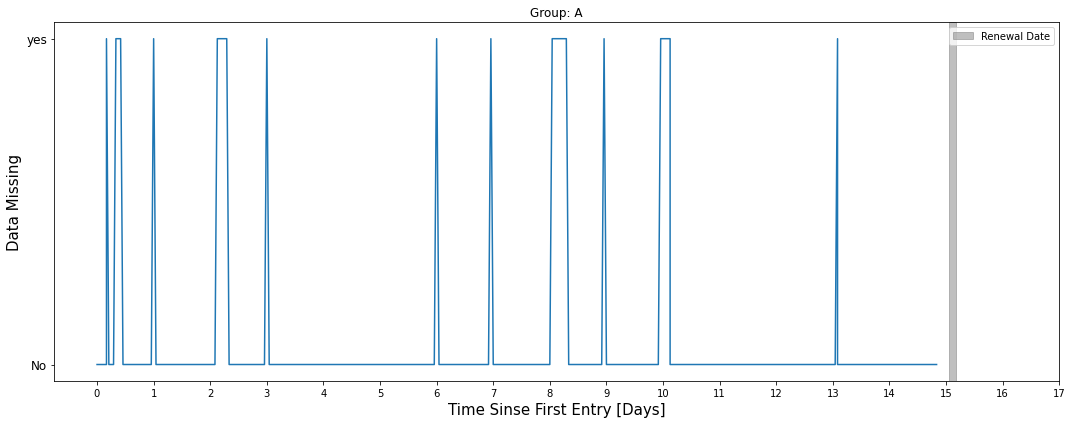

In [83]:
g = "A"


dfp = df1.loc[lambda x: x.group == g]
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(dfp["time_sinse_start"], dfp["is_missing"])

t_start = dfe1[lambda x: x.group ==g]["renew_sinse_start"]
t_stop = t_start + pd.Timedelta("3 Hour")

renew_start = 15.05833
renew_stop = 15.05833 + 0.125
ax.axvspan(renew_start, renew_stop, color="gray", label="Renewal Date", alpha=0.5)

ax.set_title(f"Group: {g}")

ax.set_yticks([0, 1])
ax.set_yticklabels(["No", "yes"], fontsize=12)
ax.set_ylabel("Data Missing", fontsize=15)

ax.set_xticks(list(range(18)))
ax.set_xticklabels(list(range(18)))
ax.set_xlabel("Time Sinse First Entry [Days]", fontsize=15)

plt.legend()
plt.tight_layout()

plt.savefig(fig_dir / f"{g}.png", dpi=300)

In [84]:
dfe1.loc[lambda x: x.group == g]

,group,first_datapoint,last_datapoint,cond_date,renew_date,time_between_test,cond_sinse_start,renew_sinse_start
0,A,2018-08-07 09:00:00,2018-08-22 05:00:00,NaT,2018-08-22 10:44:01,NaT,NaT,15 days 01:44:01


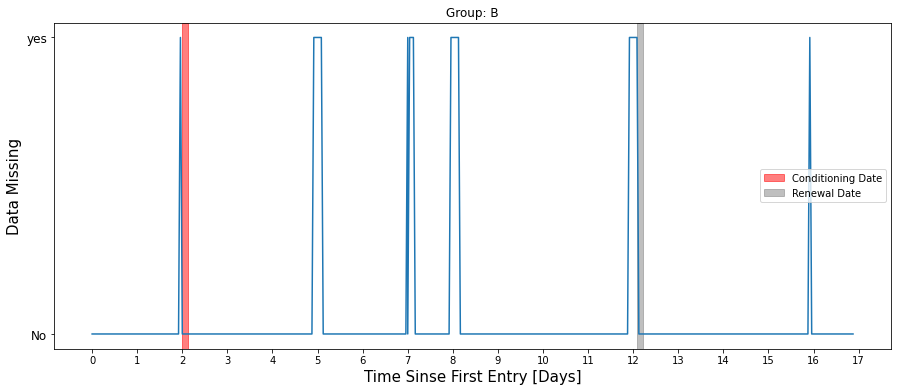

In [85]:
g = "B"


dfp = df1.loc[lambda x: x.group == g]
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(dfp["time_sinse_start"], dfp["is_missing"])

t_start = dfe1[lambda x: x.group ==g]["renew_sinse_start"]
t_stop = t_start + pd.Timedelta("3 Hour")

cond_start = 2
cond_stop = cond_start + 0.125
ax.axvspan(cond_start, cond_stop, color="red", label="Conditioning Date", alpha=0.5)


renew_start = 12.08667
renew_stop = renew_start + 0.125
ax.axvspan(renew_start, renew_stop, color="gray", label="Renewal Date", alpha=0.5)

ax.set_title(f"Group: {g}")

ax.set_yticks([0, 1])
ax.set_yticklabels(["No", "yes"], fontsize=12)
ax.set_ylabel("Data Missing", fontsize=15)

ax.set_xticks(list(range(18)))
ax.set_xticklabels(list(range(18)))
ax.set_xlabel("Time Sinse First Entry [Days]", fontsize=15)

plt.legend()

plt.savefig(fig_dir / f"{g}.png",  dpi=300)

In [86]:
dfe1.loc[lambda x: x.group == g]

,group,first_datapoint,last_datapoint,cond_date,renew_date,time_between_test,cond_sinse_start,renew_sinse_start
1,B,2018-09-19 10:00:00,2018-10-06 07:00:00,2018-09-21 10:29:11,2018-10-01 12:08:00,10 days 01:38:49,2 days 00:29:11,12 days 02:08:00


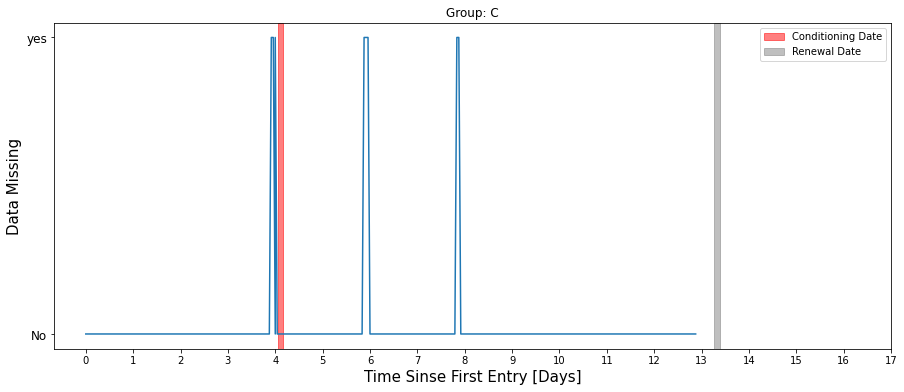

In [87]:
g = "C"


dfp = df1.loc[lambda x: x.group == g]
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(dfp["time_sinse_start"], dfp["is_missing"])

t_start = dfe1[lambda x: x.group ==g]["renew_sinse_start"]
t_stop = t_start + pd.Timedelta("3 Hour")

cond_start = 4.0475
cond_stop = cond_start + 0.125
ax.axvspan(cond_start, cond_stop, color="red", label="Conditioning Date", alpha=0.5)


renew_start = 13.25875
renew_stop = renew_start + 0.125
ax.axvspan(renew_start, renew_stop, color="gray", label="Renewal Date", alpha=0.5)

ax.set_title(f"Group: {g}")

ax.set_yticks([0, 1])
ax.set_yticklabels(["No", "yes"], fontsize=12)
ax.set_ylabel("Data Missing", fontsize=15)

ax.set_xticks(list(range(18)))
ax.set_xticklabels(list(range(18)))
ax.set_xlabel("Time Sinse First Entry [Days]", fontsize=15)

plt.legend()

plt.savefig(fig_dir / f"{g}.png", dpi=300)

In [88]:
dfe1.loc[lambda x: x.group == g].renew_date

2   2018-10-24 16:21:01
Name: renew_date, dtype: datetime64[ns]

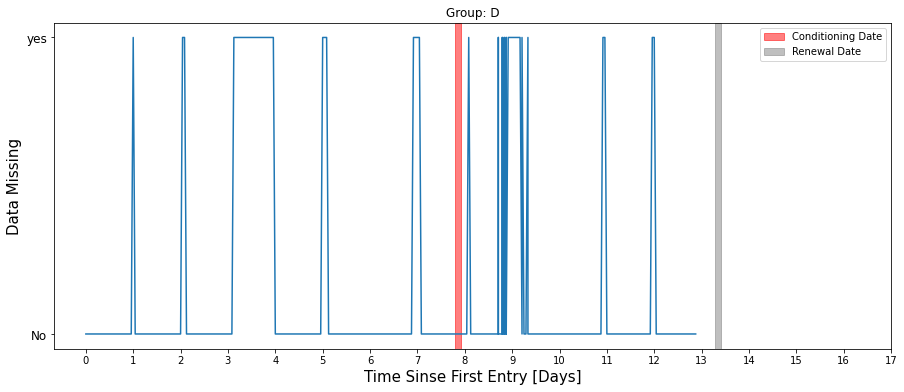

In [89]:
g = "D"


dfp = df1.loc[lambda x: x.group == g]
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(dfp["time_sinse_start"], dfp["is_missing"])

t_start = dfe1[lambda x: x.group ==g]["renew_sinse_start"]
t_stop = t_start + pd.Timedelta("3 Hour")

cond_start = 7.7917
cond_stop = cond_start + 0.125
ax.axvspan(cond_start, cond_stop, color="red", label="Conditioning Date", alpha=0.5)


renew_start = 13.29167
renew_stop = renew_start + 0.125
ax.axvspan(renew_start, renew_stop, color="gray", label="Renewal Date", alpha=0.5)

ax.set_title(f"Group: {g}")

ax.set_yticks([0, 1])
ax.set_yticklabels(["No", "yes"], fontsize=12)
ax.set_ylabel("Data Missing", fontsize=15)

ax.set_xticks(list(range(18)))
ax.set_xticklabels(list(range(18)))
ax.set_xlabel("Time Sinse First Entry [Days]", fontsize=15)

plt.legend()

plt.savefig(fig_dir / f"{g}.png", dpi=300)

In [75]:
dfe1.loc[lambda x: x.group == g].cond_sinse_start

3   7 days 01:49:00
Name: cond_sinse_start, dtype: timedelta64[ns]

In [90]:
dfe1

,group,first_datapoint,last_datapoint,cond_date,renew_date,time_between_test,cond_sinse_start,renew_sinse_start
0,A,2018-08-07 09:00:00,2018-08-22 05:00:00,NaT,2018-08-22 10:44:01,NaT,NaT,15 days 01:44:01
1,B,2018-09-19 10:00:00,2018-10-06 07:00:00,2018-09-21 10:29:11,2018-10-01 12:08:00,10 days 01:38:49,2 days 00:29:11,12 days 02:08:00
2,C,2018-10-11 10:00:00,2018-10-24 07:00:00,2018-10-15 10:01:14,2018-10-24 16:21:01,9 days 06:19:47,4 days 00:01:14,13 days 06:21:01
3,D,2018-05-30 10:00:00,2018-06-12 07:00:00,2018-06-06 11:49:00,2018-06-12 16:57:00,6 days 05:08:00,7 days 01:49:00,13 days 06:57:00
